<a href="https://colab.research.google.com/github/Ha-minss/Personal-Projects/blob/main/Zara_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import kagglehub
import os, shutil, glob, pathlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
!pip -q install kagglehub

In [3]:
path = kagglehub.dataset_download("xontoloyo/data-penjualan-zara")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/data-penjualan-zara


In [4]:
print("📂 경로:", path)
for item in os.listdir(path):
    print("-", item)

📂 경로: /kaggle/input/data-penjualan-zara
- zara.csv


In [5]:
# path 는 이미 있으니 그대로 사용
csvs = glob.glob(os.path.join(path, "**", "*.csv"), recursive=True)
print("찾은 CSV:", csvs)

# 'zara'가 이름에 들어간 것을 우선 선택, 없으면 첫 번째
csv_path = next((p for p in csvs if "zara" in os.path.basename(p).lower()), csvs[0])

# 세미콜론 구분 CSV → sep=";"
df = pd.read_csv(csv_path, sep=";", low_memory=False)
df.head(30)

찾은 CSV: ['/kaggle/input/data-penjualan-zara/zara.csv']


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN
5,117590,End-cap,No,Clothing,No,2968,Zara,https://www.zara.com/us/en/contrasting-collar-...,320298385-807-2,CONTRASTING COLLAR JACKET,Relaxed fit jacket. Contrasting lapel collar a...,79.90,USD,2024-02-19T08:50:09.140497,jackets,MAN
6,189118,Front of Store,Yes,Clothing,Yes,952,Zara,https://www.zara.com/us/en/faux-leather-puffer...,278112470-800-2,FAUX LEATHER PUFFER JACKET,Faux leather puffer jacket. High collar and lo...,69.99,USD,2024-02-19T08:50:09.688951,jackets,MAN
7,182157,Aisle,No,Clothing,No,2421,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,322972485-431-46,SUIT JACKET IN 100% LINEN,Straight fit blazer made of linen. Notched lap...,159.00,USD,2024-02-19T08:50:10.200777,jackets,MAN
8,141861,Aisle,Yes,Clothing,Yes,1916,Zara,https://www.zara.com/us/en/100-wool-suit-jacke...,313854165-401-46,100% WOOL SUIT JACKET,Jacket made of Italian wool. Pointed lapel col...,169.00,USD,2024-02-19T08:50:10.880741,jackets,MAN
9,137121,Aisle,No,Clothing,Yes,656,Zara,https://www.zara.com/us/en/100-feather-fill-pu...,312372602-800-2,100% FEATHER FILL PUFFER JACKET,Puffer jacket made of shiny finish technical f...,169.00,USD,2024-02-19T08:50:11.380061,jackets,MAN


In [6]:
print(df.shape)

(252, 16)


In [7]:
print(df.columns)

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [9]:
rename_map = {
    "brand":"Brand", "url":"URL", "sku":"SKU", "name":"Name",
    "description":"Description", "price":"Price", "currency":"Currency",
    "scraped_at":"Scraped_at", "terms":"Terms", "section":"Section",
    "Product ID":"Product_ID", "Product Position":"Product_Position",
    "Product Category":"Product_Category", "Sales Volume":"Sales_Volume"
}
df = df.rename(columns=rename_map)

In [10]:
for col in df.columns:
  print(f" {col} - 고유값갯수: {df[col].nunique()}")
  print(df[col].value_counts())
  print("="*50)

 Product_ID - 고유값갯수: 252
Product_ID
185102    1
188771    1
180176    1
112917    1
192936    1
         ..
159182    1
199233    1
137044    1
154736    1
141434    1
Name: count, Length: 252, dtype: int64
 Product_Position - 고유값갯수: 3
Product_Position
Aisle             97
End-cap           86
Front of Store    69
Name: count, dtype: int64
 Promotion - 고유값갯수: 2
Promotion
No     132
Yes    120
Name: count, dtype: int64
 Product_Category - 고유값갯수: 1
Product_Category
Clothing    252
Name: count, dtype: int64
 Seasonal - 고유값갯수: 2
Seasonal
Yes    128
No     124
Name: count, dtype: int64
 Sales_Volume - 고유값갯수: 234
Sales_Volume
1466    3
2220    2
1796    2
1145    2
1524    2
       ..
2973    1
1014    1
2222    1
2534    1
2870    1
Name: count, Length: 234, dtype: int64
 Brand - 고유값갯수: 1
Brand
Zara    252
Name: count, dtype: int64
 URL - 고유값갯수: 228
URL
https://www.zara.com/us/en/hooded-technical-jacket-p01538301.html                  2
https://www.zara.com/us/en/houndstooth-suit-jacket-p04

In [11]:
# 숫자형으로 변환
for col in ["Price", "Sales_Volume"]:
    if col in df.columns:  # colunms → columns 로 수정
        df[col] = pd.to_numeric(df[col], errors="coerce")

# 이진문자열 변환
for col in ["Promotion", "Seasonal"]:
    if col in df.columns:
        df[col] = (
            df[col].astype(str).str.strip().str.lower()
            .map({"yes": 1, "no": 0})
            .astype("Int64")  # .astype("float64".astype("Int64")) → 잘못된 부분 수정
        )

# 범주형 변환
for col in ["Product_Position", "Section", "Terms"]:
    if col in df.columns:
        df[col] = df[col].astype("category")

# 필요 없는 컬럼 드롭
drop_cols_default = [
    "Product_Category", "Product_ID", "Brand", "URL", "SKU",
    "Name", "Description", "Currency", "Scraped_at"
]
to_drop = [c for c in drop_cols_default if c in df.columns]
df = df.drop(columns=to_drop)


In [12]:
#결측치 체크
print(df.isnull().sum())

Product_Position    0
Promotion           0
Seasonal            0
Sales_Volume        0
Price               0
Terms               0
Section             0
dtype: int64


In [13]:
#기초통계량
num_cols = ["Price","Sales_Volume"]
display(df[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
Price,252.0,86.252540,52.083205,7.99,49.9,79.9,109.00,439.0
Sales_Volume,252.0,1823.702381,697.703748,529.00,1243.0,1839.5,2398.75,2989.0


In [14]:
#범주형 통계량
cat_cols = ["Product_Position","Promotion","Seasonal","Terms","Section"]
def quick_group(col):
    out = (df.groupby(col, dropna=False)
             .agg(n=("Price","size"),
                  total_sales=("Sales_Volume","sum"),
                  avg_price=("Price","mean"),
                  avg_sales=("Sales_Volume","mean"))
             .sort_values("total_sales", ascending=False))
    return out

for c in ["Section","Product_Position","Terms"]:
    if c in df.columns:
        print(f"\n## {c}")
        display(quick_group(c).head(15))


## Section


/tmp/ipython-input-386807783.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (df.groupby(col, dropna=False)


,n,total_sales,avg_price,avg_sales
Section,,,,
MAN,218,396199,91.824587,1817.426606
WOMAN,34,63374,50.525882,1863.941176



## Product_Position


/tmp/ipython-input-386807783.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (df.groupby(col, dropna=False)


,n,total_sales,avg_price,avg_sales
Product_Position,,,,
Aisle,97,177396,88.785773,1828.824742
End-cap,86,152930,81.276395,1778.255814
Front of Store,69,129247,88.893478,1873.144928



## Terms


/tmp/ipython-input-386807783.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out = (df.groupby(col, dropna=False)


,n,total_sales,avg_price,avg_sales
Terms,,,,
jackets,140,259468,105.757929,1853.342857
sweaters,41,75242,54.862683,1835.170732
shoes,31,57906,64.873548,1867.935484
t-shirts,32,53637,67.427813,1676.156250
jeans,8,13320,63.923750,1665.000000


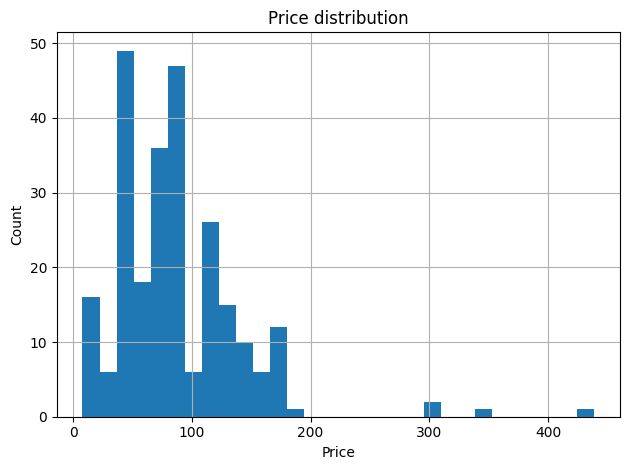

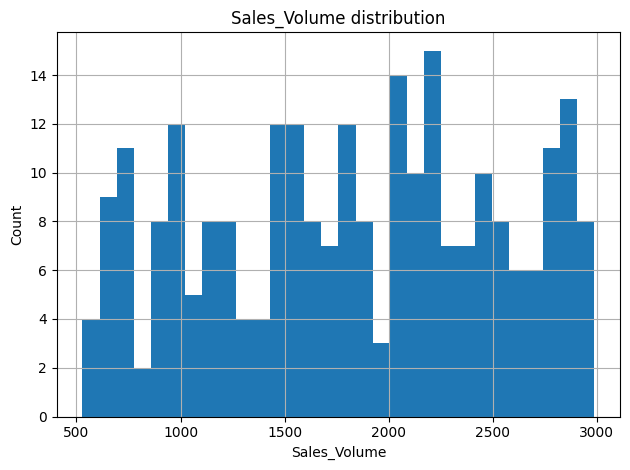

In [15]:
for c in ["Price","Sales_Volume"]:
  if c in df.columns:
    plt.figure()
    df[c].hist(bins=30)
    plt.title(f"{c} distribution")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3212629171.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


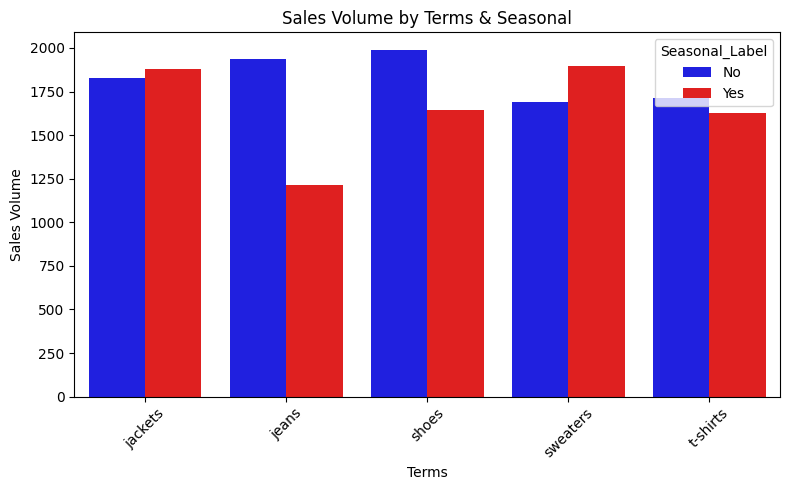

/tmp/ipython-input-3212629171.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


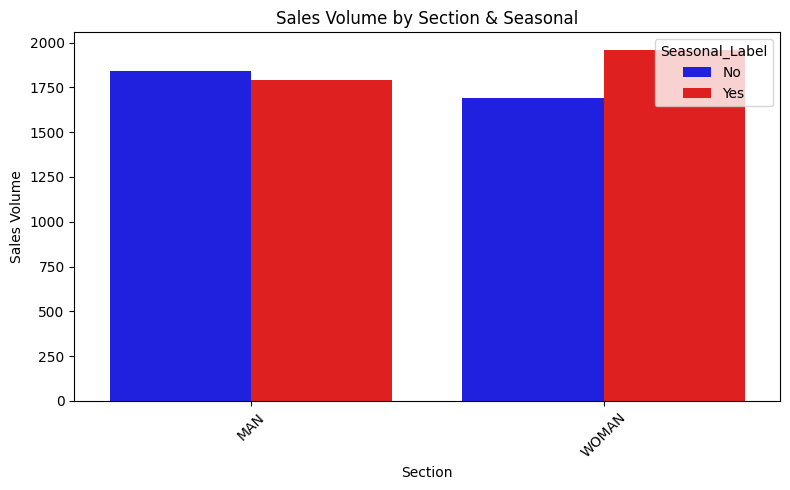

/tmp/ipython-input-3212629171.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


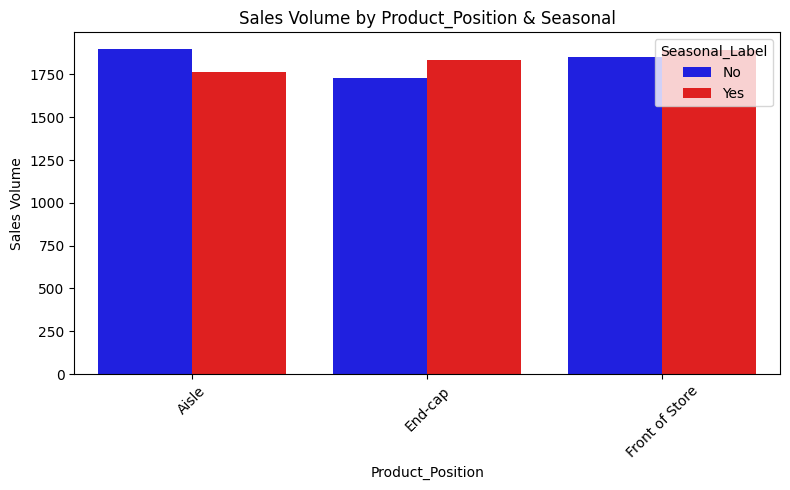

In [26]:
# Seasonal 값 라벨 변경
df["Seasonal_Label"] = df["Seasonal"].map({0: "No", 1: "Yes"})

def boxplot_by_seasonal(cat_col):
    plt.figure(figsize=(8,5))
    sns.barplot(
        x=cat_col,
        y="Sales_Volume",
        hue="Seasonal_Label",
        data=df,
        ci=None,  # 오차막대 제거
        palette={"No": "blue", "Yes": "red"}
    )
    plt.title(f"Sales Volume by {cat_col} & Seasonal")
    plt.ylabel("Sales Volume")
    plt.xlabel(cat_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 실행 예시
for c in ["Terms", "Section", "Product_Position"]:
    if c in df.columns:
        boxplot_by_seasonal(c)

/tmp/ipython-input-3056164299.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


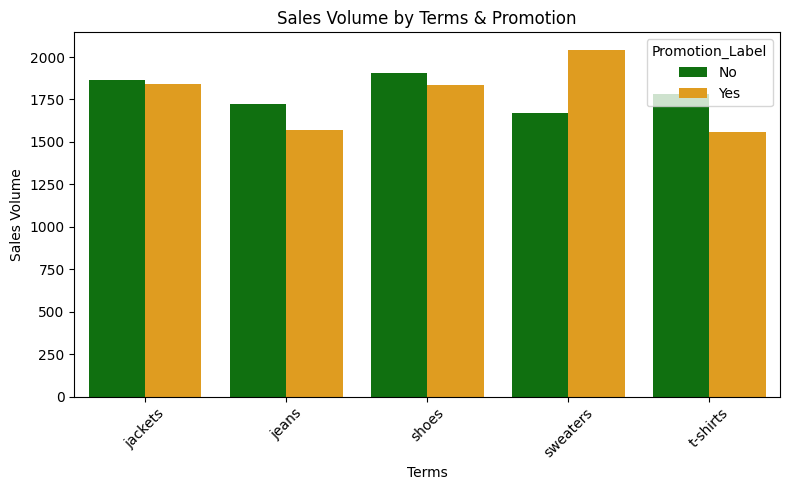

/tmp/ipython-input-3056164299.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


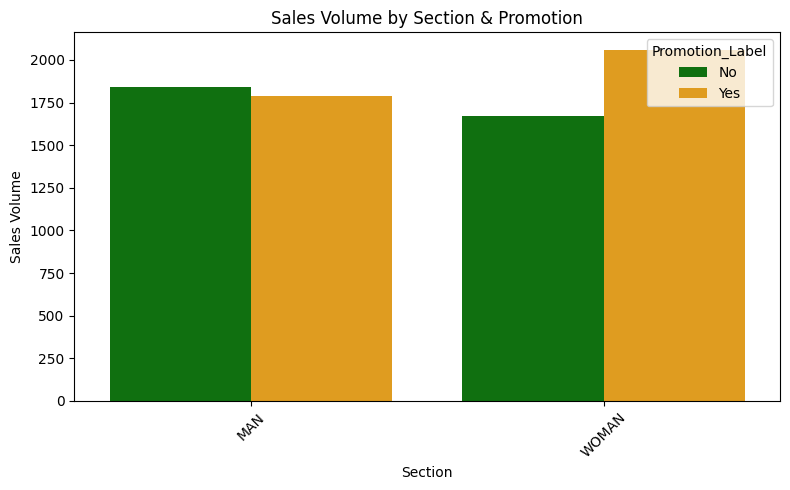

/tmp/ipython-input-3056164299.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


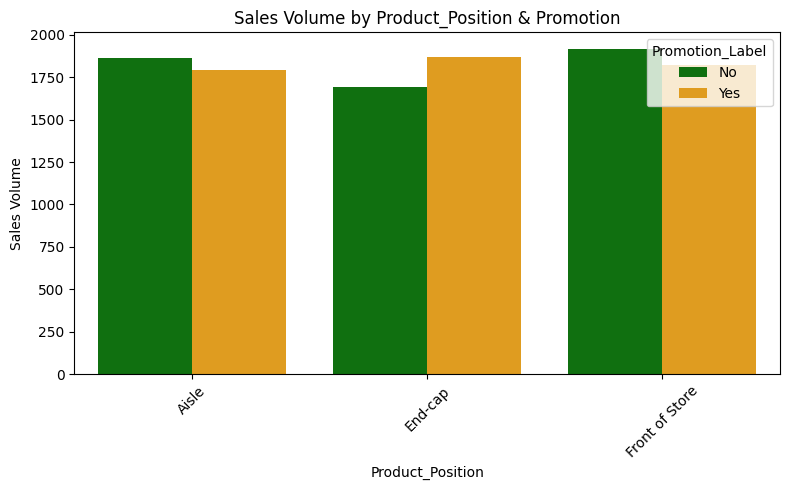

In [27]:
# Promotion 값 라벨 변경
df["Promotion_Label"] = df["Promotion"].map({0: "No", 1: "Yes"})

def barplot_by_promotion(cat_col):
    plt.figure(figsize=(8,5))
    sns.barplot(
        x=cat_col,
        y="Sales_Volume",
        hue="Promotion_Label",
        data=df,
        ci=None,  # 오차막대 제거
        palette={"No": "green", "Yes": "orange"}
    )
    plt.title(f"Sales Volume by {cat_col} & Promotion")
    plt.ylabel("Sales Volume")
    plt.xlabel(cat_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 실행 예시
for c in ["Terms", "Section", "Product_Position"]:
    if c in df.columns:
        barplot_by_promotion(c)

,Price,Sales_Volume,Promotion,Seasonal
Price,1.000000,-0.071359,0.113013,-0.003226
Sales_Volume,-0.071359,1.000000,0.004755,-0.002883
Promotion,0.113013,0.004755,1.000000,0.000757
Seasonal,-0.003226,-0.002883,0.000757,1.000000


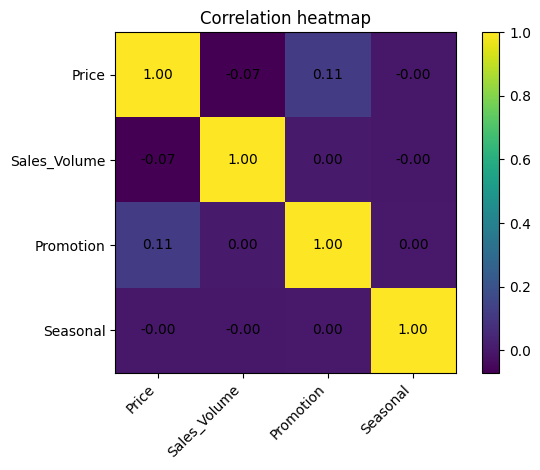

In [17]:
# === 5) 상관행렬(연속형 + 이진) ===
corr_cols = [c for c in ["Price","Sales_Volume","Promotion","Seasonal"] if c in df.columns]
if len(corr_cols) >= 2:
    corr = df[corr_cols].astype(float).corr()
    display(corr)

    plt.figure()
    plt.imshow(corr, interpolation="nearest")
    plt.title("Correlation heatmap")
    plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha="right")
    plt.yticks(range(len(corr_cols)), corr_cols)
    for i in range(len(corr_cols)):
        for j in range(len(corr_cols)):
            plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center")
    plt.colorbar(); plt.tight_layout(); plt.show()

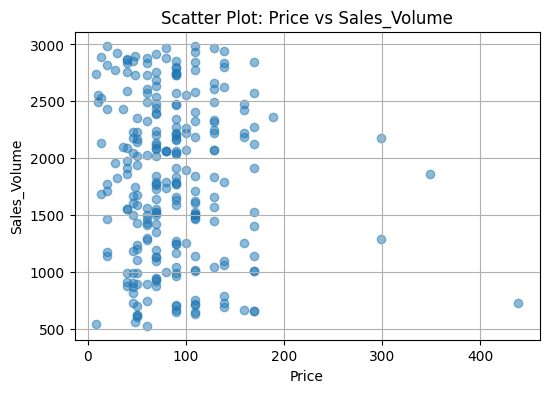

In [18]:
#산포도
plt.figure(figsize=(6, 4))
plt.scatter(df["Price"], df["Sales_Volume"], alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Sales_Volume")
plt.title("Scatter Plot: Price vs Sales_Volume")
plt.grid(True)
plt.show()